# Lab 3 : Working with Neural Networks

---


Total Points: **90**


Submission Deadline :  **08 April 2022, 23:59 hours**


In case of any queries, please contact the TAs.

---



General Instructions:

---



1. You have to do this lab individually
2. **You have to perform the custom implementation in Part 1 of the assignment.** Libraries like **Keras or torch.nn are not allowed** for part 1 (except where it is mentioned).
3. Please start early as some of the experiments take time to run
4. All the code should be submitted in the form of a single Jupyter/colab notebook.
5. Points for each sub-section are mentioned in the questions.
6. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/)
7. Submission must be done in the Google classroom. The code as well as the accompanying observations should be made part of the colab notebook.
8. **Code Readability** is very important. Modularize your code by making use of classes and functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as required.
9. You are expected to submit your **detailed inferences** (preferably in a text block) and not just an error free code.
10. Students are expected to follow the **honor code** of the class.



In this lab, we will perform one **regression** and one **multi-class classification** tasks. We will consider the Indian car selling platform data (say from TrueValue, CarDekho etc) for the regression problem, and for multi-class classification, we will consider Mute language Dataset. For Car Price prediction dataset refer attachted file -'train_set_CarMarketPlace.csv' and 'test_set_CarMarketPlace.csv'. For Mute disability Sign refer zip file attachted.


---



## Section 1:  **(Total points = 40)**

---

Q1. Develop a Multi-Layer Perceptron (MLP) Neural Network to predict the car prices (Dataset loading function and accessing data matrix and target values have been provided in the code section) **Use of built-in library functions for the specific implementation as asked in the questions are not allowed in this section**

1. Perform an exploratory analysis on the given dataset (train+test taken together).
  1. Print the attribute names, values and label names and values.
  2. Explore dataset by finding minimum, maximum, mean and standard deviation for each attribute.
  3. Plot a histogram indicating the distribution of different attributes in the dataset. \\
{Expected output is ten histograms, each corresponding to a different attribute. The X-axis is the domain of the attribute, and Y-axis is the frequency of the attribute corresponding to a domain}  **(3 point)**
2. Perform data pre-processing operations like standardization and normalization.  Plot the histrograms again and note the change in histograms due to standarization. Also,  load train, test set into pandas dataframe.**(2 points)**

3. Implement the three layer fully connected MLP feedforward model with only one hidden layer having 15 hidden units + bias. For this problem make your decision on the number of output units. Also, your implementation should facilitate a choice between Sigmoid & Tanh (RELU & Linear is also allowed) activations at each layer of MLP for the user.  **( 10 points)**

4. Implement Back-propagation algorithm to train the parameters of the MLP created in the previous section. The Backpropagation should support gradient flow for both Sigmoid and Tanh activation functions. **(10 points)**

5. Train your model using the Mean Squared Errors. Mention your choices of the hyperparameters for training. Perform traning with batch gradient descent and stochastic gradeint descent. Plot the graph of traning error versus Epochs for both the training methods. Report the final accuracy you achieved on the Test Data using both the traning methods. **(2+3 = 5)**

6. Using the best traning method from the above traning, train your MLP with different learning rates given as [ 0.5, 0.1, 0.01, 0.001, 0.0001]. You can try your custom values as well. **(5 points)**

7. Plot the training error versus epochs for each learning rate in a single line graph. Also, plot accuracy versus lerning rate. Print the testing error. Comment on your overall observations. **(3+2 = 5 points)**

In [ ]:
# IMPORTING REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL

## install google drive file downloader
!pip install googledrivedownloader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1.0. Loading Data

In [ ]:
# Download the zip file which contains all the input files inside it
folder_id = '14u5bBHzrBDrnuMnVvKX6YLeqkwHAv1WR'
folder_name = 'data'
zip_folder_name = "data.zip"


# Download zip folder
!gdown $folder_id -O ./$zip_folder_name

# Unzipping
!unzip -q -o $zip_folder_name
# Removing zip folder
!rm -rf $zip_folder_name

# Unzipping the zip files inside the 'data' directory
for file_name in os.listdir(folder_name):
  if file_name.endswith(".zip"):
    loc = os.path.join(folder_name, file_name)
    !unzip -q -o $loc -d $folder_name
    !rm -rf $loc


Downloading...
From: https://drive.google.com/uc?id=14u5bBHzrBDrnuMnVvKX6YLeqkwHAv1WR
To: /content/data.zip
100% 21.8M/21.8M [00:00<00:00, 78.4MB/s]


In [ ]:
# DATASET contains 11 columns.
# The 11'th column = 'Price' is the one we have to predict. Rest are input features
col_names = ["Company","Model", "Odometer_reading","fuel", "transmission",
             "owner", "mileage", "engine", "max_power", "seats", "Price"]

train_df = pd.read_csv('./data/train_set_CarMarketPlace.csv', header = 0,names = col_names)
train_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

test_df = pd.read_csv('./data/test_set_CarMarketPlace.csv', header = 0,names = col_names)
test_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

total_df = pd.concat([train_df, test_df])

n_train, n_test = train_df.shape[0], test_df.shape[0]
print(f"Train Dataset Shape:{train_df.shape}\nTest Dataset Shape:{test_df.shape}\n\
Entire Dataset Shape:{total_df.shape}\n ")

Train Dataset Shape:(6320, 11)
Test Dataset Shape:(1581, 11)
Entire Dataset Shape:(7901, 11)
 


### 1.1. Exploratory analysis
Perform an exploratory analysis on the given dataset (train+test taken together).
  1. Print the attribute names, values and label names and values.
  

In [ ]:
print("ATTRIBUTES and their VALUES:\n\n", total_df.iloc[:,:10])
print("\n\nTARGET VALUE = Price:\n\n", total_df.iloc[:,10])

ATTRIBUTES and their VALUES:

       Company   Model  Odometer_reading    fuel transmission   owner  mileage  \
0       Lexus  2019.0           20000.0  Petrol    Automatic   First    22.37   
1      Maruti  2013.0           80000.0     CNG       Manual  Second    32.52   
2        Tata  2017.0           70000.0  Diesel       Manual   First    19.09   
3        Ford  2016.0           70000.0  Diesel       Manual  Second    25.83   
4      Maruti  2016.0           81000.0  Diesel       Manual  Second    28.09   
...       ...     ...               ...     ...          ...     ...      ...   
1577     Audi  2014.0          230000.0  Diesel    Automatic   First    15.73   
1578     Ford  2018.0           33360.0  Diesel       Manual   First    22.77   
1579  Hyundai  2017.0           54000.0  Diesel       Manual   First    22.54   
1580   Maruti  2010.0          120000.0  Petrol       Manual   Third    19.70   
1581     Tata  2006.0           74000.0  Diesel       Manual   First    13.70 

2. Explore dataset by finding minimum, maximum, mean and standard deviation for each attribute.
  

In [ ]:
# defining categorical columns separately, to perform different analysis on them
categorical_columns = ["Company", "fuel", "transmission", "owner"]
for i in range(len(categorical_columns)):
  total_df[categorical_columns[i]] = total_df[categorical_columns[i]].astype('category')

print("\nFor NUMERICAL ATTRIBUTES:\n")
total_df.describe(exclude=['category'])


For NUMERICAL ATTRIBUTES:



,Model,Odometer_reading,mileage,engine,max_power,seats,Price
count,7901.000000,7.901000e+03,7901.000000,7901.000000,7901.000000,7901.000000,7.901000e+03
mean,2013.980762,6.922319e+04,19.421449,1458.531958,91.542652,5.416656,6.474381e+05
std,3.862856,5.679331e+04,4.036465,503.994359,35.704798,0.959454,8.063619e+05
min,1994.000000,1.000000e+00,0.000000,624.000000,32.800000,2.000000,2.999900e+04
25%,2012.000000,3.500000e+04,16.780000,1197.000000,68.050000,5.000000,2.700000e+05
50%,2015.000000,6.000000e+04,19.300000,1248.000000,82.000000,5.000000,4.500000e+05
75%,2017.000000,9.600000e+04,22.320000,1582.000000,102.000000,5.000000,6.900000e+05
max,2020.000000,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,1.000000e+07


In [ ]:
print("\nFor CATEGORICAL ATTRIBUTES:")
for col in col_names:
  if total_df[col].dtype == "category":
    print(f"\nAttribute name: {col}\n")
    print(total_df[col].value_counts()[:10].to_string())


For CATEGORICAL ATTRIBUTES:

Attribute name: Company

Maruti        2367
Hyundai       1360
Mahindra       758
Tata           719
Honda          465
Toyota         452
Ford           388
Chevrolet      230
Renault        228
Volkswagen     184

Attribute name: fuel

Diesel    4298
Petrol    3516
CNG         52
LPG         35

Attribute name: transmission

Manual       6864
Automatic    1037

Attribute name: owner

First     5215
Second    2016
Third      510
Fourth     160


3. Plot a histogram indicating the distribution of different attributes in the dataset. \\
{Expected output is ten histograms, each corresponding to a different attribute. The X-axis is the domain of the attribute, and Y-axis is the frequency of the attribute corresponding to a domain}  **(3 point)**

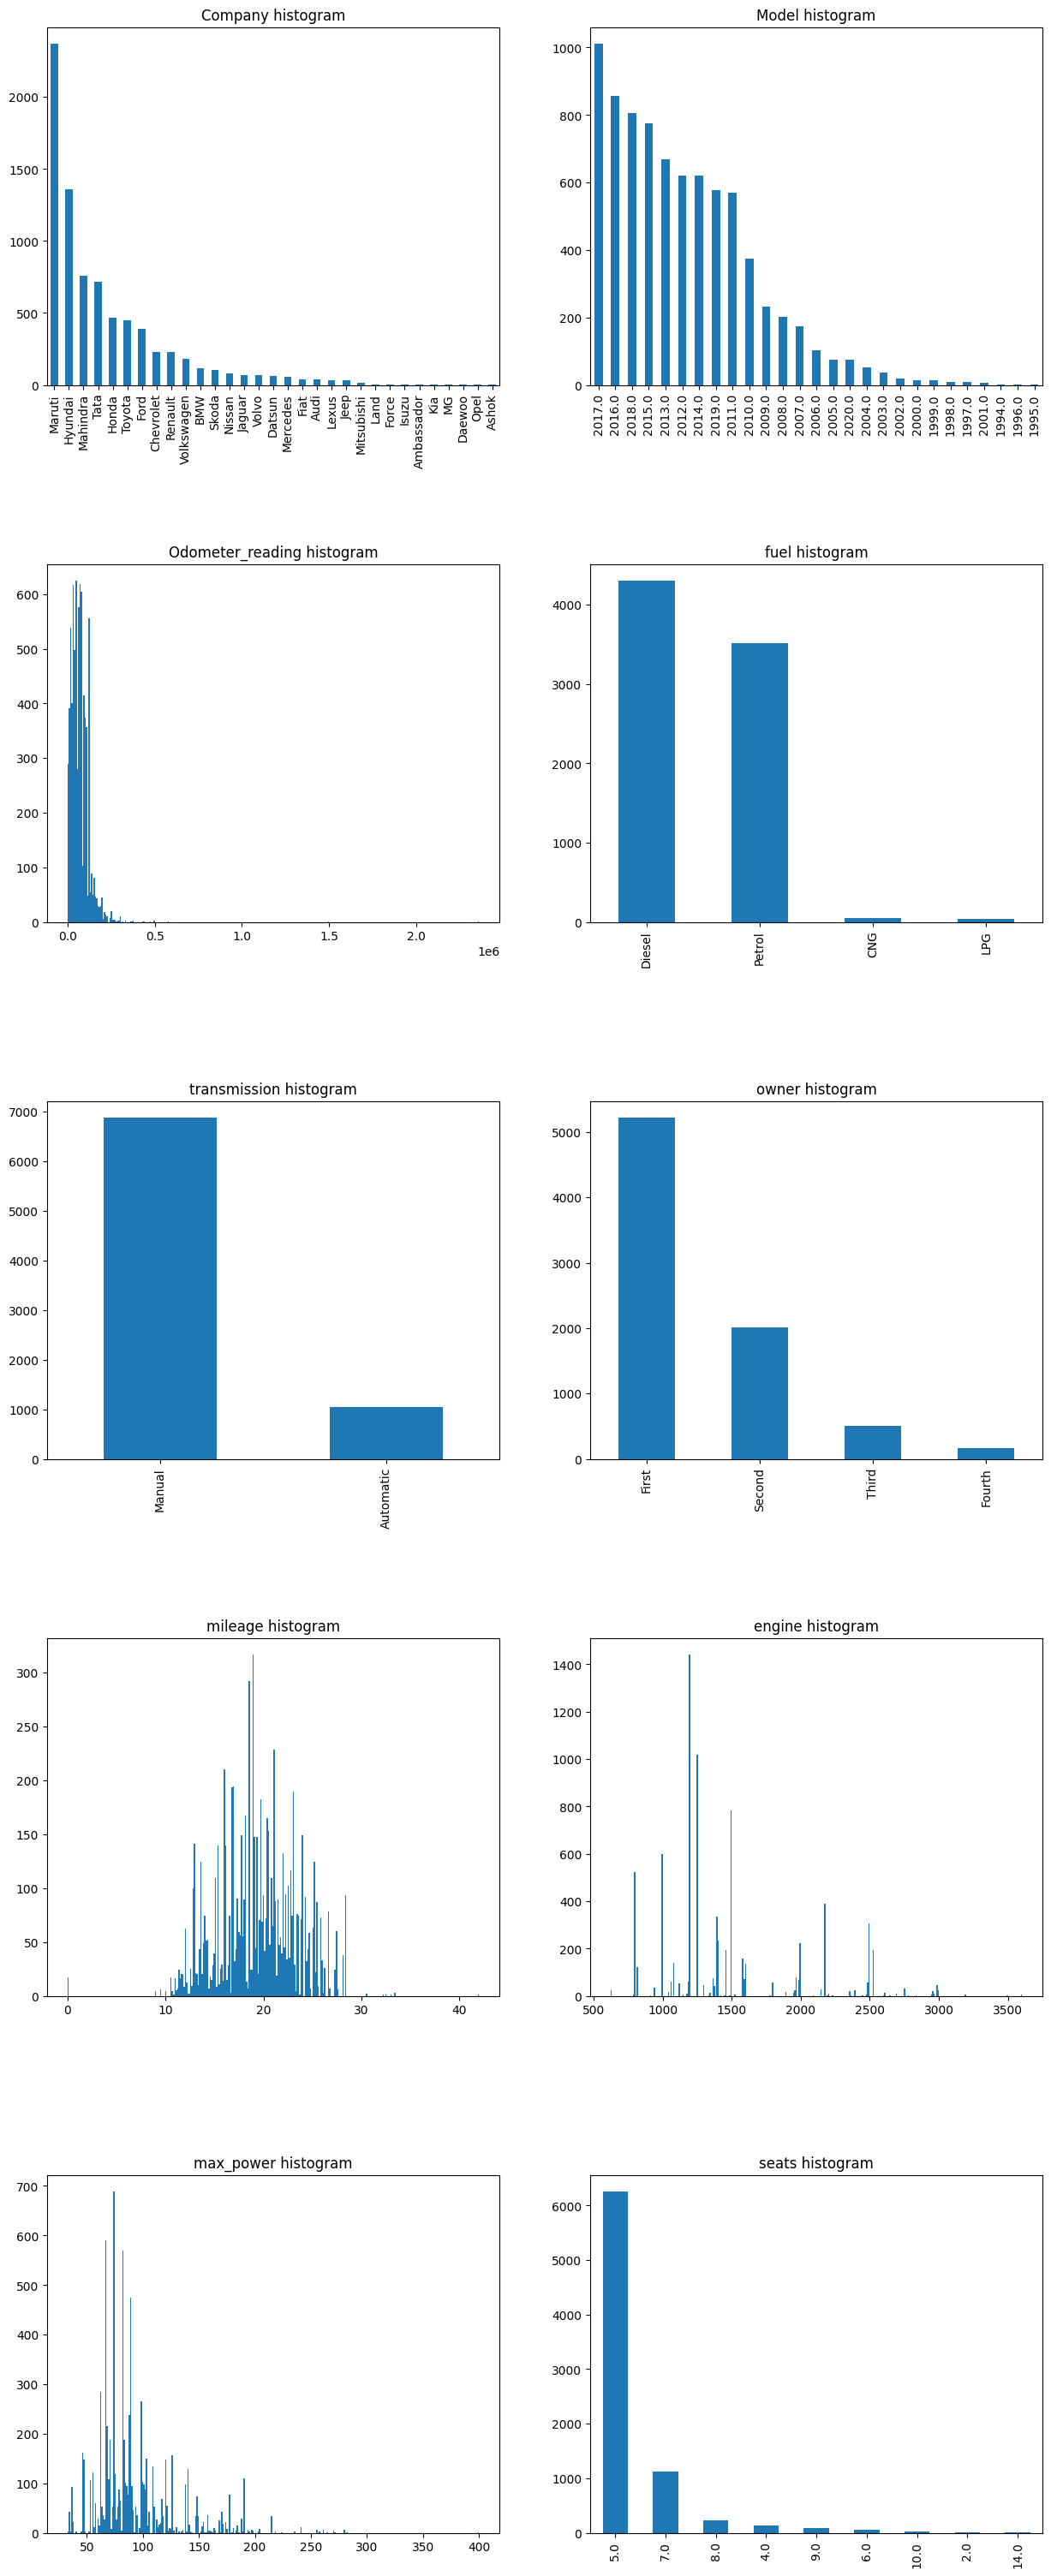

In [ ]:
def plot_histogram(df):

  fig = plt.figure(figsize=(15,38))
  fig.subplots_adjust(hspace=.5)

  pos = 1

  for col in df.columns[:-1]:
    fig.add_subplot(5,2,pos)
    plt.title(f"{col} histogram")
    count = df[col].value_counts()
    if len(count) > 100:
      plt.hist(list(df[col]), bins=int(len(df[col])/25))
    else:
      df[col].value_counts().plot(kind="bar")
    pos += 1

  plt.show()

plot_histogram(total_df)

### 1.2. Data pre-processing
Perform data pre-processing operations like standardization and normalization.  Plot the histrograms again and note the change in histograms due to standarization. Also,  load train, test set into pandas dataframe.**(2 points)**

In [ ]:
# function to convert categorical data to numerical data
def convert_cat_to_num(df, col_names):
  for i in range(len(col_names)):
    df[col_names[i]] = df[col_names[i]].cat.codes.values

convert_cat_to_num(total_df, categorical_columns)



HISTOGRAMS AFTER NORMALIZATION:



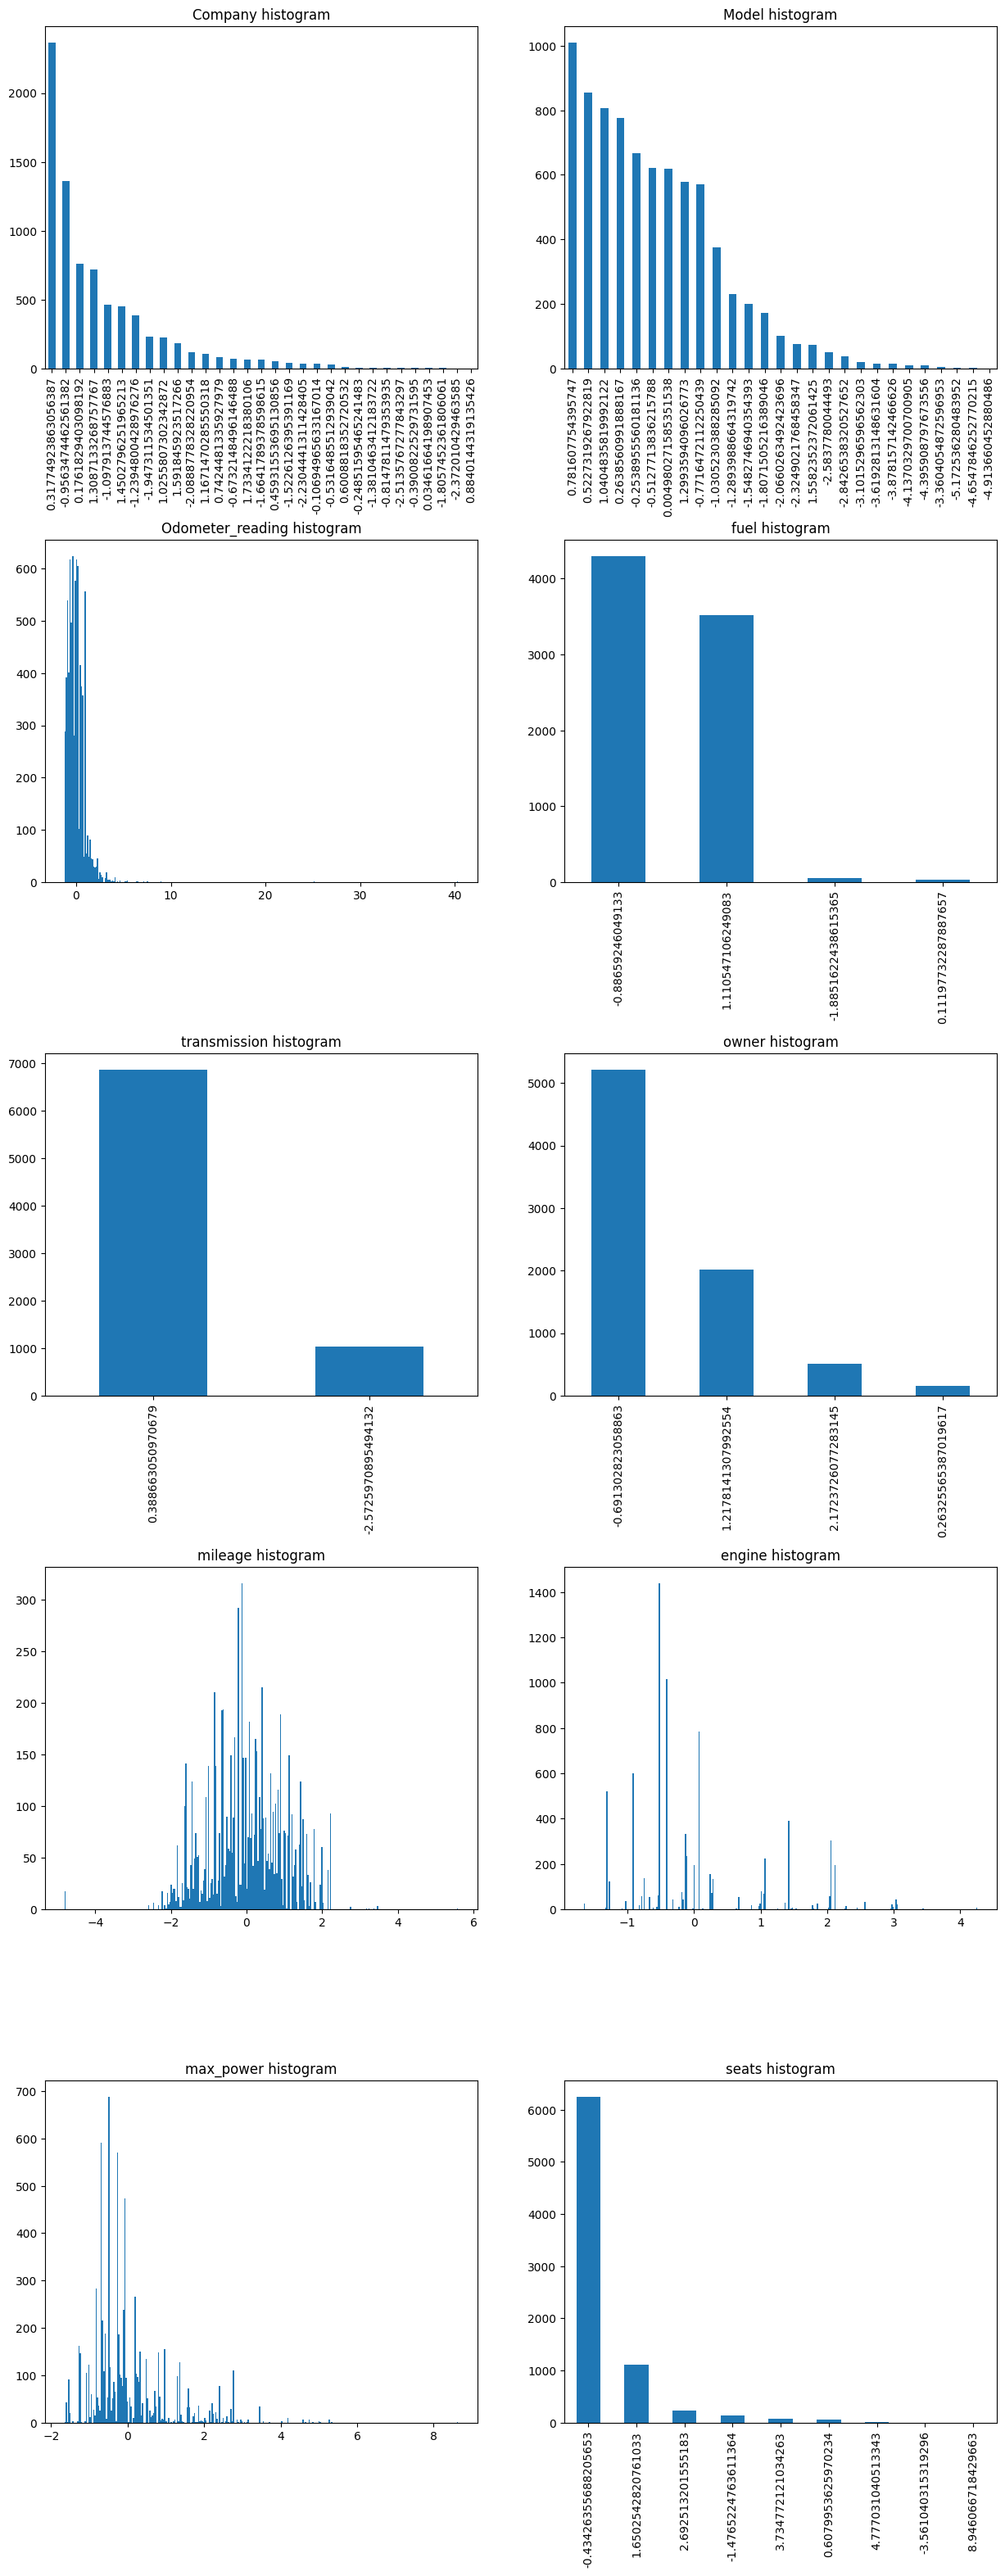

In [ ]:
# Feature Normalizing the dataset by subtracting by mean and dividing by standard deviation
for c in total_df.columns:
  total_df[c] = (total_df[c] - total_df[c].mean())/total_df[c].std()

print("\nHISTOGRAMS AFTER NORMALIZATION:\n")
plot_histogram(total_df)

# loading train and test sets into different dataframes
train_df = total_df.iloc[0:n_train,:]
test_df = total_df.iloc[n_train:,:]

### INFERENCE:
There is no change in the histogram values after normalization. Only the labels (i.e. the values of the x-axis) have changed, as they have now been normalized around 0.

The categorical columns have also been converted to numerical values

### 1.3. 3-layer fully connected MLP

Implement the three layer fully connected MLP feedforward model with only one hidden layer having 15 hidden units + bias. For this problem make your decision on the number of output units. Also, your implementation should facilitate a choice between Sigmoid & Tanh (RELU & Linear is also allowed) activations at each layer of MLP for the user.  **( 10 points)**



### 1.4. Back-propagation
Implement Back-propagation algorithm to train the parameters of the MLP created in the previous section. The Backpropagation should support gradient flow for both ReLU and leaky ReLU activation functions. **(10 points)**

In [ ]:
from keras.utils import pad_sequences
from abc import ABC, abstractmethod

# Define Abstract class
class Layer(ABC):
  def __init__(self):
    self.input = None
    self.output = None

  # computes the output Y of a layer for a given input X
  def forward_propagation(self, input):
    pass

  # computes dE/dX for a given dE/dY (and update parameters if any)
  def backward_propagation(self, output_error, learning_rate):
    pass

**Class for Fully Connected Layer**
- implements forward and backward propagation

In [ ]:
# Fully Connected Layer
class FCLayer(Layer):
  # n_input = number of input neurons
  # n_output = number of output neurons
  # type_of_gd tells whether the Gradient Descent is Batch or Stochastic
  def __init__(self, n_input, n_output, type_of_gd, batch_size):
    self.weights = np.random.normal(0, 2/n_input, (n_output, n_input))
    self.bias = np.random.normal(0, 2/n_input, (n_output, 1))
    self.type_of_gd = type_of_gd

    # Variables to be used only for Batch Gradient Descent
    self.batch_size = batch_size  # size of a batch
    self.batch_dE_dW = 0    # variable to store sum of dE/dW over entire batch
    self.batch_dE_dB = 0    # variable to store sum of dE/dB over entire batch
    self.current_batch_n = 0  # Stores number of inputs in current batch
    # Weight Update for batch gradient descent will be perfomed when current_batch_n == batch_size

  # Forward Propagation
  # self.input is an np array with shape (n_input,1)
  def forward_propagation(self, input):
    self.input = input
    Y = np.dot(self.weights, self.input) + self.bias
    self.output = Y

    if self.type_of_gd == "Batch":
      self.current_batch_n += 1
    return Y

  # Backward Propagation
  # assuming dE/dY is a column vector
  # lr = learning rate
  def backward_propagation(self, dE_dY, lr):
    # Calculating required gradients for performing gradient descent
    dE_dX = np.dot(self.weights.T, dE_dY)
    dE_dW = np.dot(dE_dY, self.input.T)
    dE_dB = dE_dY

    if self.type_of_gd == "Stochastic":   # update on each input
      self.weights = self.weights - lr * dE_dW
      self.bias = self.bias - lr * dE_dB
    else:         # Batch Gradient Descent - update if input size == batch_size
      self.batch_dE_dW += dE_dW
      self.batch_dE_dB += dE_dB
      # If current batch has reached the batch size
      if self.current_batch_n % self.batch_size == 0:
        self.weights = self.weights - lr * self.batch_dE_dW/self.batch_size
        self.bias = self.bias - lr * self.batch_dE_dB/self.batch_size
        self.current_batch_n = 0
        self.batch_dE_dB = 0
        self.batch_dE_dW = 0
    return dE_dX


**Class for Activation Layer**
- implements forward and backward propagation

In [ ]:
# Activation Layer (ReLU)
class ActivationLayer(Layer):
  # constructor to initialize class with the activation function and
  # activation function derivative.
  # Activation can be chosen between RELU and Leaky RELU at the time of object declaration
  def __init__(self, activation_func, activation_func_der):
    self.activation = activation_func
    self.activation_der = activation_func_der

  # Forward Propagation
  def forward_propagation(self, input):
    self.input = input
    self.output = self.activation(self.input)
    return self.output

  # Backward Propagation
  # assuming dE/dY is a column vector
  # lr will not be used here. However, it is kept to keep arguments uniform
  def backward_propagation(self, dE_dY, lr):
    dE_dX = dE_dY * self.activation_der(self.input)
    return dE_dX



**Activation Functions and their Derivatives**

RELU and Leaky RELU

In [ ]:
# ACTIVATION FUNCTIONS
leaky_coeff = 0.01 # value to be multiplied with input for x<0

# RELU
def relu(X):
  zeros = np.array([np.zeros(len(X))]).T
  Y = np.maximum(X, zeros)
  return Y

# Leaky RELU
def leaky_relu(X):
  Y = []
  for i in range(len(X)):
    if X[i]>=0:
      Y.append(X[i])
    else:
      Y.append(X[i]*leaky_coeff)
  Y = np.array([Y]).T
  return np.array([Y]).T

# ACTIVATION FUNCTIONS' DERIVATIVES
# relu derivative
def relu_der(X):
  Y = []
  for i in range(len(X)):
    if X[i] > 0:
      Y.append(1)
    elif X[i] == 0:
      Y.append(0.5)   # derivative at 0 is undefined. So I took the value in between 0 and 1
    else:
      Y.append(0)
  return np.array([Y]).T

# Leaky relu derivative
def leaky_relu_der(X):
  Y = []
  for i in range(len(X)):
    if X[i] > 0:
      Y.append(1)
    elif X[i] == 0:
      Y.append((leaky_coeff+1)/2)   # derivative at 0 is undefined. So I took the value in between 0 and 1
    else:
      Y.append(leaky_coeff)
  return np.array([Y]).T


### 1.5. Training using MSE

Train your model using the Mean Squared Errors. Mention your choices of the hyperparameters for training. Perform training with batch gradient descent and stochastic gradeint descent. Plot the graph of training error versus Epochs for both the training methods. Report the final accuracy you achieved on the Test Data using both the training methods. **(2+3 = 5)**


In [ ]:
# Loss Function using MSE
def mse(Y_pred, Y):
  n = len(Y)
  mse = (1/n)* (Y_pred - Y)**2
  return mse

# Loss Function Derivative using MSE
# This function returns dE/dY
def mse_der(Y_pred, Y):
  n = len(Y)
  # Derivative wrt Y of (1/n)* (Y_pred - Y)^2 = 2/n * (Y_pred - Y)
  dE_dY = (2/n) * (Y_pred - Y)
  return dE_dY

# function to plot training errors
def plot_training_errors(training_errors, type_of_training = "Batch"):
  epochs = len(training_errors)
  x_epochs = np.arange(1,epochs+1)
  plt.plot(x_epochs, training_errors)
  plt.xlabel("Epochs")
  plt.xticks(x_epochs,x_epochs)
  plt.ylabel("Training Error")
  plt.title(f"Training using {type_of_training} Gradient Descent")
  plt.show()

# Runs the trained model on a dataframe. Returns error
def calc_model_error(df, objects_MLP):
  loss = 0
  # Loop over all training examples in the dataframe
  n = df.shape[0]
  for j in range(n):
    X = np.array([df.iloc[j,:10].tolist()]).T
    Y = np.array([[df.iloc[j,10].tolist()]])

    input, output = X, None
    # Perform forward propagation to get final output:
    for obj in objects_MLP:
      output = obj.forward_propagation(input)
      # setting the next layer's input as current layer's output
      input = output

    loss += mse(output,Y)[0,0]
  return loss/n

**Declaring Objects of classes**

In [ ]:
# Function to declare and initialize objects of the Layers classes
# It returns a list of objects in order of their occurence in MLP
def declare_objects(type_of_training = "Batch"):
  hidden_layer, final_layer = None, None

  # Hidden layer object - takes the 10 input features from the training data as input
  # It outputs the 15 units of the hidden layer
  if(type_of_training == "Batch"):
    hidden_layer = FCLayer(10,15, "Batch", n_train)
  else:
    hidden_layer = FCLayer(10,15, "Stochastic", 1)

  # Final layer object - takes 15 hidden layer units as input and outputs price
  if(type_of_training == "Batch"):
    final_layer = FCLayer(15,1, "Batch", n_train)
  else:
    final_layer = FCLayer(15,1, "Stochastic", 1)

  # Declaring Activation layer object for hidden layer
  # Choose between RELU and Leaky RELU here:
  hidden_layer_activation = ActivationLayer(relu, relu_der)

  # Creating the list of objects in order of their occurence in MLP
  objects_MLP = [hidden_layer, hidden_layer_activation, final_layer]
  return objects_MLP

**Model Training using Forward and Backward Propagation**

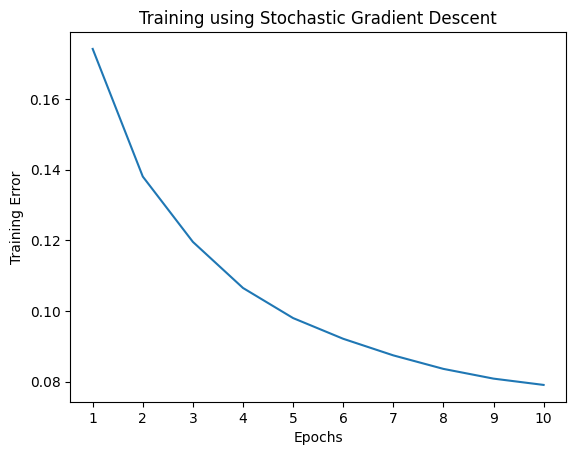


TEST LOSS after model training using STOCHASTIC Gradient Descent: 0.07695898098310931



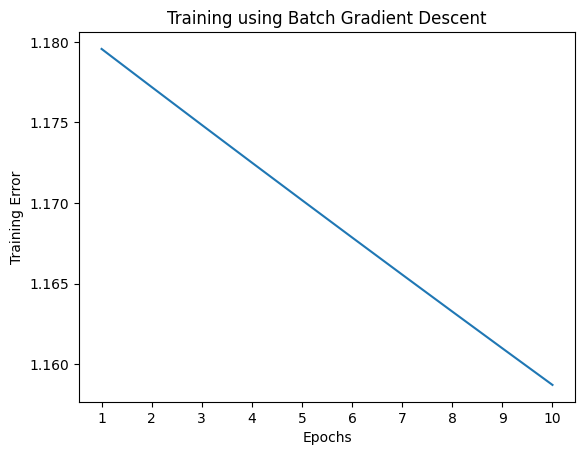


TEST LOSS after model training using BATCH Gradient Descent: 1.1978649647236124



In [ ]:
# MODEL TRAINING:
epochs = 10
learning_rate = 0.001

def train_model(type_of_gd, epochs, learning_rate, to_plot = False):
  # create class objects for Batch or Stochastic gradient descent
  objects_MLP = declare_objects(type_of_gd)

  # list to store training errors per epoch
  training_errors = []

  for i in range(epochs):
    # Loop over all training examples in the training set for each epoch
    for j in range(n_train):
      X = np.array([train_df.iloc[j,:10].tolist()]).T
      Y = np.array([[train_df.iloc[j,10].tolist()]])

      input, output = X, None

      # Forward propagation:
      for obj in objects_MLP:
        output = obj.forward_propagation(input)
        # setting the next layer's input as current layer's output
        input = output

      # Now, output corresponds to predicted Y in the final layer
      # Calculating dE/dY using MSE to perform backward propagation
      dE_dY = mse_der(output, Y)

      # Backward propagation:
      for obj in objects_MLP[len(objects_MLP)::-1]:
        dE_dX = obj.backward_propagation(dE_dY, learning_rate)
        # Setting output error for previous layer as the dE/dX of the current layer
        dE_dY = dE_dX

    # Calculating training error for current epoch
    curr_training_error = calc_model_error(train_df, objects_MLP)
    training_errors.append(curr_training_error)

  if(to_plot == True):
    # Plotting the training errors
    plot_training_errors(training_errors, type_of_gd)

  # Finding the TEST LOSS on test dataset
  final_test_loss = calc_model_error(test_df, objects_MLP)
  return (training_errors, final_test_loss)

stoc_training_errors, stoc_test_loss = train_model("Stochastic", epochs,learning_rate, to_plot = True)
print(f"\nTEST LOSS after model training using STOCHASTIC Gradient Descent: {stoc_test_loss}\n")
batch_training_errors, batch_test_loss = train_model("Batch", epochs, learning_rate, to_plot = True)
print(f"\nTEST LOSS after model training using BATCH Gradient Descent: {batch_test_loss}\n")

### INFERENCE:
Hyperparameters used:
- Learning rate: chosen to be 0.001 as I found that the model was able to converge well with it.
- Epochs - 10. I chose this value as I found that the training error reduced to an acceptable amount after these many epochs.
- Activation Function used: RELU. The user can also choose Leaky RELU as the activation function. They just have to pass it as a parameter while declaring Activation function object

The best model turns out to be the one with Stochastic Gradient Descent. It gives lower training as well as final Test loss.

### 1.6. Different Learning Rates
Using the best training method from the above traning, train your MLP with different learning rates given as [ 0.5, 0.1, 0.01, 0.001, 0.0001]. You can try your custom values as well. (5 points)



### 1.7. Plotting errors and accuracy
Plot the training error versus epochs for each learning rate in a single line graph. Also, plot accuracy versus learning rate. Print the testing error. Comment on your overall observations. (3+2 = 5 points)

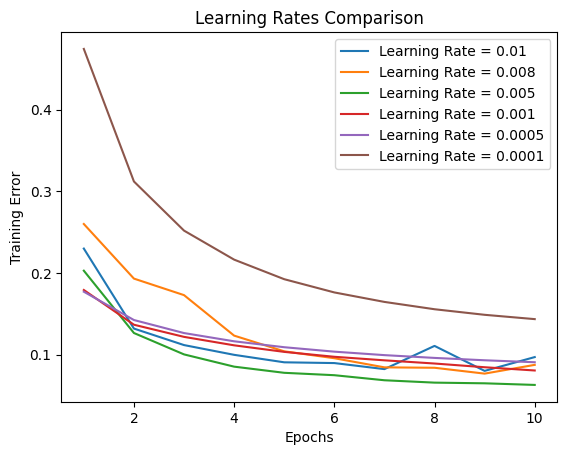

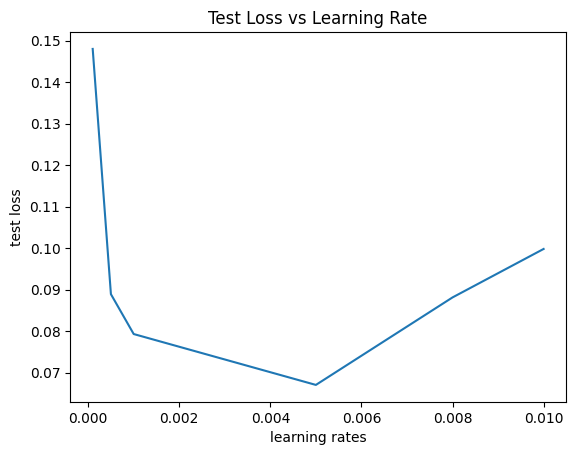

In [ ]:
learning_rates = [0.01,0.008, 0.005, 0.001, 0.0005, 0.0001]
epochs = 10
test_losses = []

for i in range(len(learning_rates)):
  learning_rate = learning_rates[i]
  training_errors, test_error = train_model("Stochastic", epochs, learning_rate)
  test_losses.append(test_error)
  x_epochs = np.arange(1,epochs+1)
  plt.plot(x_epochs,training_errors, label = f"Learning Rate = {learning_rate}")

# Plotting Training error vs epochs for each learning rate
plt.legend(loc = "upper right")
plt.title("Learning Rates Comparison")
plt.xlabel("Epochs")
plt.ylabel("Training Error")
plt.show()

# Plotting test loss vs learning rate
plt.plot(learning_rates, test_losses)
plt.title("Test Loss vs Learning Rate")
plt.xlabel("learning rates")
plt.ylabel("test loss")
plt.show()


### INFERENCE:
- We can see that the best training and test losses are achieved at learning rate = 0.005.
- Below 0.005, the learning rate is too low, which cause the gradient descent to converge very slowly.
- Above 0.005, the learning rate is high which causes the gradient descent to diverge.

**Other Observations**: The model performs well on the test set, as is witnessed by the low test error, similar to the low training error. This shows that our model did not overfit the training data, and was able to approximate the actual distribution as well. Hence, it got good results on the test set


---



## Section 2:  **(Total points = 50)**

---
Q2. In this question, we will learn to perform multi-class classification on Mute signs using a convolutional neural network.


1. Explore the Dataset. Display one randomly selected image from each class. **(2 points)**

2. Plot the distribution of number of images in each class. Is the distribution uniform? Comment. **(2+1 points)**

3. Process the dataset through the [Canny Edge detection](https://medium.com/@nikatsanka/comparing-edge-detection-methods-638a2919476e) and display the feature map for one example from each class. **(5 points)**

4. Using the Keras library, implement a CNN model for classification. Use the following network architecture:  **(7 points)**
*  Input layer
*  Con2D with 32 neurons 3x3 kernals and ReLU activation.
*  Con2D with 32 neurons 3x3 kernals and ReLU activation with batch normalization.
*  Max Pooling layer with pool-size 2x2 and padding as 'valid'.
*  Con2D with 32 neurons 3x3 kernals and relu activation and strides 2.
*  Con2D with 24 neurons 3x3 kernals and ReLU activation.
*  Batch normalization
*  Max Pooling layer with size 2x2 and 'valid' as padding
*  Con2D with 24 neurons 3x3 kernals and ReLU activation and stride 2.
*  Con2D with 16 neurons 3x3 kernals and ReLU activation and followed by Batch normalization.
*  Max Pooling layer with size 2x2 and 'valid' as padding.  
*  Fully Connected Dense Layer with 128 neurons , relu activation and L2 kernel regularizer with factor of 0.05.  
*  Fully Connected Dense Layer with 128 neurons , relu activation and L2 kernel regularizer with factor of 0.05.  
*  Dropout of 30% ie. 0.3
*  Global Average pooling 2D layer
*  Fully Connected Dense Layer with number of classes neurons and softmax activation.

3. Implement using cross-entropy loss (error function) for the multi-class classification. Use it for traning the model. Bonus points for custom implementation of cross entropy loss function. **(5 points + 5 bonus points)**

4. Compile and train your model with four different optimizers viz. SGD,
RMSprop, Adam,\& Adagrad. Plot the training loss for all four optimizers. Comment on your observations. **(10 points)**. Add early stopping with (min_delta=0.01, patience=2) while compiling and training your model. **(3points)**.

   NOTE: You can try to find best learning rate from following: [0.001, 0.0001, 0.00001, 0.01] and take batch size to be 32 in data generators.

5. Choose different hyperparameters for Conv Layers, change number of Conv layer and drop-out rate and train your model. Plot training and test accuracies and loss function wrt epochs for different hyper-parameters. Do you find any improvement in classification performance. Report your analysis. **(10 points)**



In [ ]:
# import Sign dataset
import keras
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad
import keras.backend as K

tf.random.set_seed(42)
np.random.seed(42)

### 2.1. Exploring the dataset
Explore the Dataset. Display one randomly selected image from each class. (2 points)



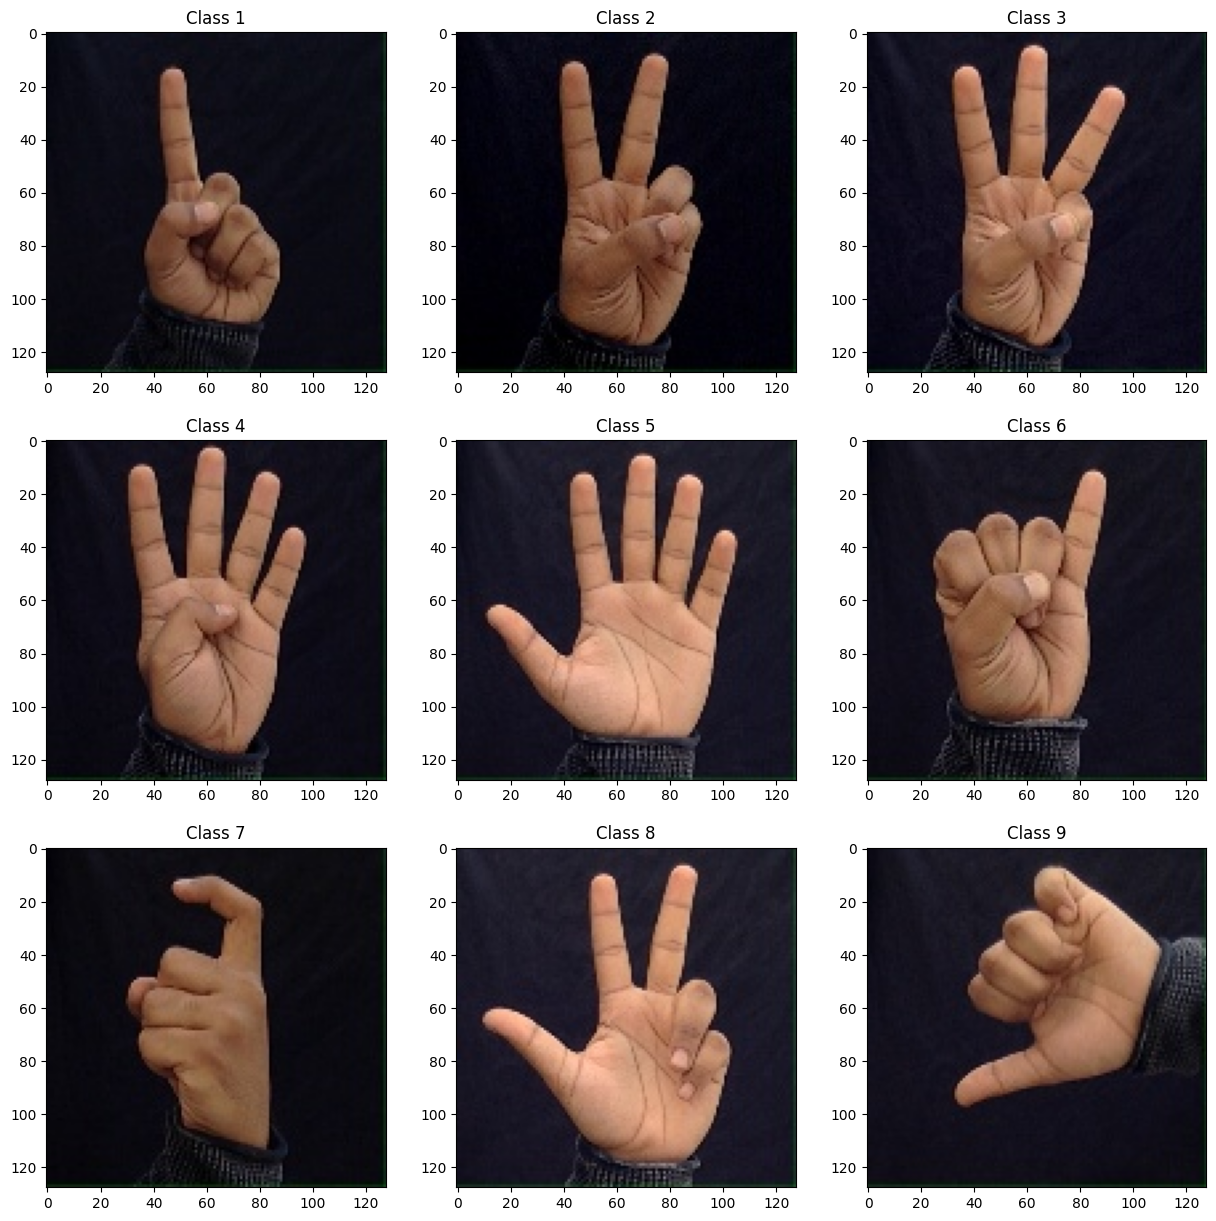

In [ ]:
# Dataset Exploration
dir = os.path.join(folder_name, "train_data")
img_size = (128,128)

# Function to display one image from each class
def display_images(dir, canny = False):
  global img_size
  # to read the classes in sorted order, i.e., from 1 to 9
  dir_list = os.listdir(dir)
  dir_list.sort()

  # dividing the figure into 3*3 for the 9 classes
  fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15,15))
  i = 0
  for subdir in dir_list:
    fileslist = os.listdir(os.path.join(dir, subdir))
    random_img = np.random.choice(fileslist)
    img_path = os.path.join(dir, subdir, random_img)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if(canny == True):
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = Canny_Edge_Detection(img)
      axes[int(i/3),int(i%3)].imshow(img, cmap = 'gray')
    else:
      axes[int(i/3),int(i%3)].imshow(img)
    axes[int(i/3),int(i%3)].set_title(f'Class {subdir}')
    i += 1

display_images(dir)

### 2.2. Distribution of images
Plot the distribution of number of images in each class. Is the distribution uniform? Comment. (2+1 points)



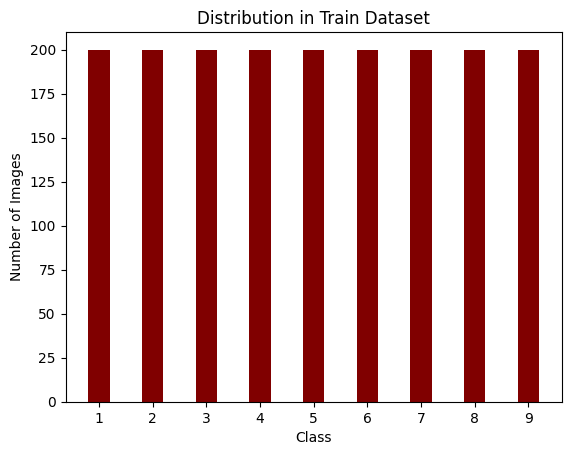

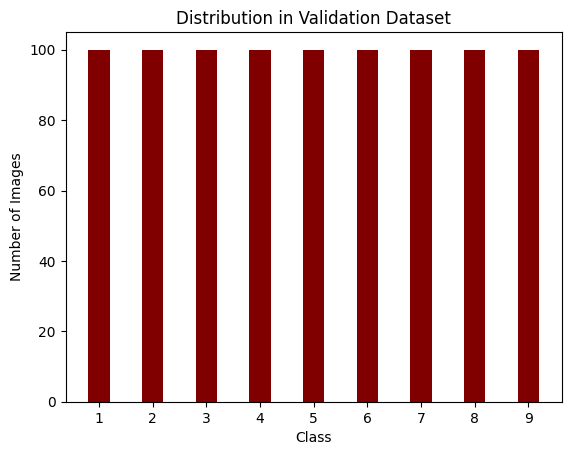

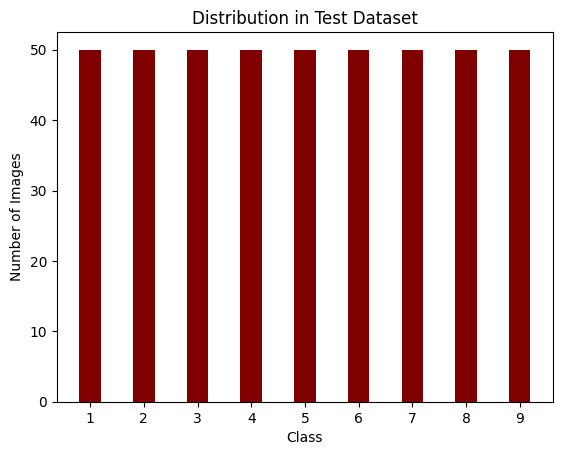

In [ ]:
# Function to plot the number of images in each class, given a dataset
def plot_distribution(dir, type):
  dir_list = os.listdir(dir)
  dir_list.sort()
  X = np.arange(1,10)
  Y = []
  for subdir in dir_list:
    n_files = len(os.listdir(os.path.join(dir, subdir)))
    Y.append(n_files)
  plt.bar(X, Y, color = 'maroon', width = 0.4)
  plt.xlabel('Class')
  plt.ylabel('Number of Images')
  plt.title(f'Distribution in {type} Dataset')
  plt.xticks(X, X)
  plt.show()

# For Training Dataset
train_dir = os.path.join(folder_name, 'train_data')
plot_distribution(train_dir, 'Train')

# For Validation Dataset
valid_dir = os.path.join(folder_name, 'valid_data')
plot_distribution(valid_dir, 'Validation')

# For Test Dataset
test_dir = os.path.join(folder_name, 'test_data')
plot_distribution(test_dir, 'Test')

#### INFERENCE:
The dataset is uniform in all three datasets: train, validation and test. We can see that the they contain equal number of images in each class. They contain 200, 100, and 50 images in each class in trian, validation and test sets respectively.
This shows the uniformity in the class distribution.

### 2.3. Canny Edge detection
Process the dataset through the Canny Edge detection and display the feature map for one example from each class. (5 points)


In [ ]:
def Canny_Edge_Detection(input_img):
  # Setting canny parameter values
  t_low = 90  # Lower Threshold
  t_high = 150  # Upper threshold

  input_img = input_img.astype(np.uint8)
  # Applying the Canny Edge filter
  img_edges = cv2.Canny(input_img, t_low, t_high)
  img_edges = img_edges.reshape(input_img.shape)
  return img_edges

# calling keras ImageDataGenerator and passing Canny Edge detection as the preprocessing function
data_gen = ImageDataGenerator(preprocessing_function=Canny_Edge_Detection)

# This will apply the edge detection to all the images inside the directory
# TO DO: try batch_size other than 32
batch_size = 32
train_gen = data_gen.flow_from_directory(train_dir, target_size=img_size, color_mode="grayscale", batch_size = batch_size)
valid_gen = data_gen.flow_from_directory(valid_dir, target_size=img_size, color_mode="grayscale", batch_size = batch_size)
test_gen = data_gen.flow_from_directory(test_dir, target_size=img_size, color_mode="grayscale", batch_size = batch_size)

Found 1800 images belonging to 9 classes.
Found 900 images belonging to 9 classes.
Found 450 images belonging to 9 classes.


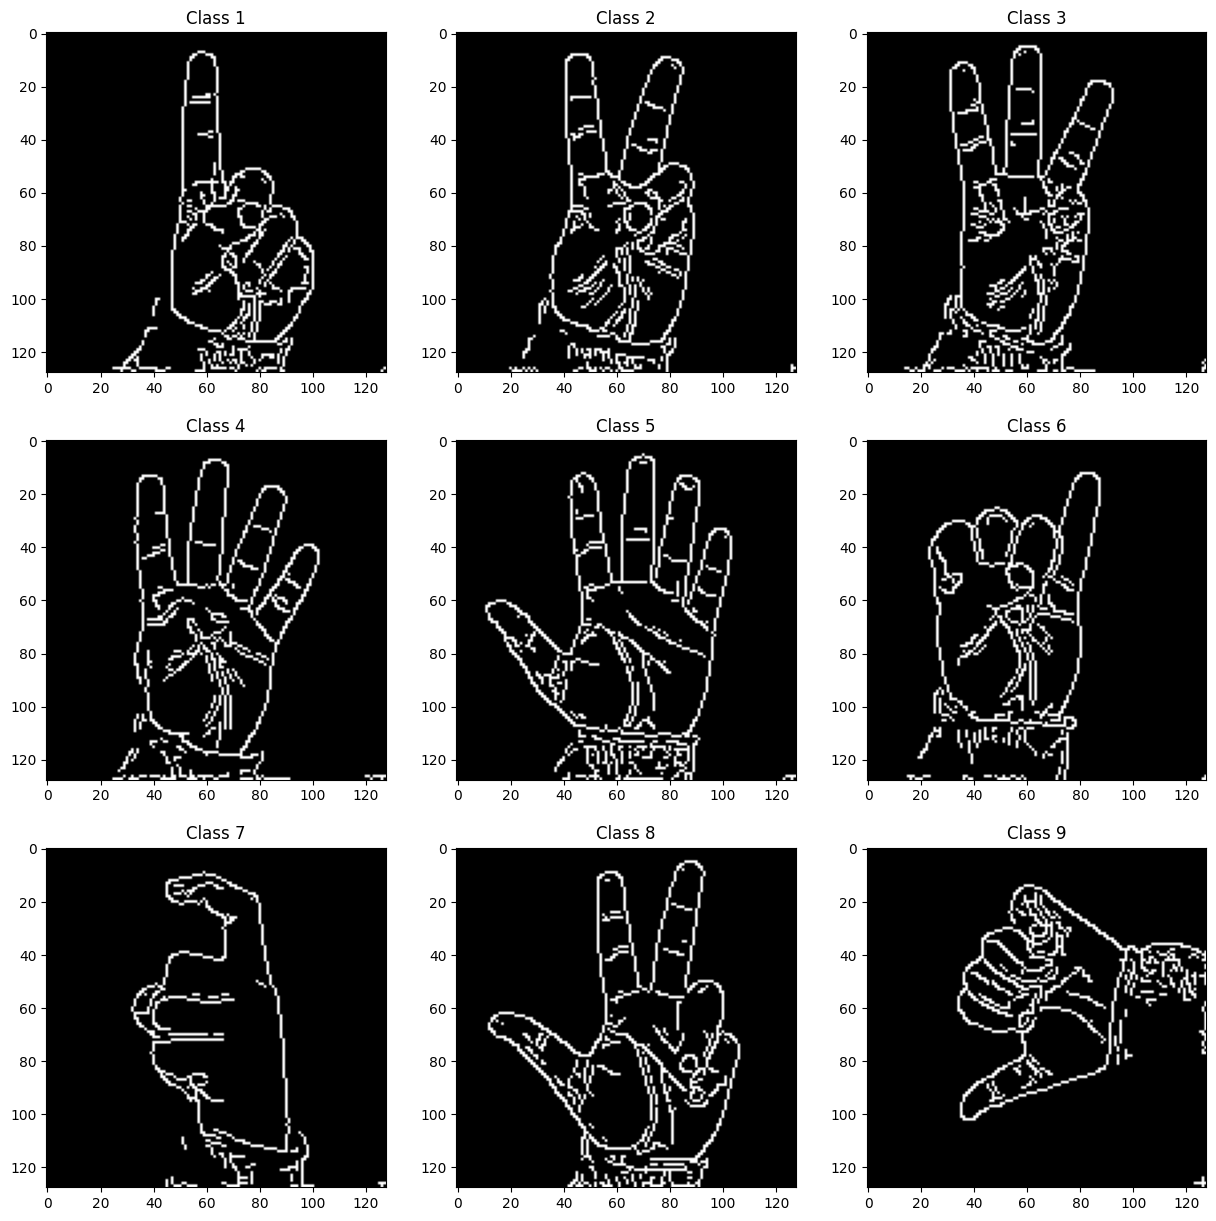

In [ ]:
# Display one image from each class after Canny Edge Detection
display_images(train_dir, canny = True)


### 2.4. CNN (Convolutional Neural Network) model
Using the Keras library, implement a CNN model for classification. Use the following network architecture: (7 points)

*  Input layer
*  Con2D with 32 neurons 3x3 kernals and ReLU activation.
*  Con2D with 32 neurons 3x3 kernals and ReLU activation with batch normalization.
*  Max Pooling layer with pool-size 2x2 and padding as 'valid'.
*  Con2D with 32 neurons 3x3 kernals and relu activation and strides 2.
*  Con2D with 24 neurons 3x3 kernals and ReLU activation.
*  Batch normalization
*  Max Pooling layer with size 2x2 and 'valid' as padding
*  Con2D with 24 neurons 3x3 kernals and ReLU activation and stride 2.
*  Con2D with 16 neurons 3x3 kernals and ReLU activation and followed by Batch normalization.
*  Max Pooling layer with size 2x2 and 'valid' as padding.  
*  Fully Connected Dense Layer with 128 neurons , relu activation and L2 kernel regularizer with factor of 0.05.  
*  Fully Connected Dense Layer with 128 neurons , relu activation and L2 kernel regularizer with factor of 0.05.  
*  Dropout of 30% ie. 0.3
*  Global Average pooling 2D layer
*  Fully Connected Dense Layer with number of classes neurons and softmax activation.

In [ ]:
# Function which prepares a keras model using given loss function & optimizer
def prepare_model(loss_function, optimizer):
  # Model structure
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation = "relu"))
  model.add(Conv2D(32, (3,3), activation = "relu"))
  model.add(BatchNormalization(synchronized=True))
  model.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

  model.add(Conv2D(32, (3,3), activation = "relu", strides = 2))
  model.add(Conv2D(24, (3,3), activation = "relu"))
  model.add(BatchNormalization(synchronized=True))
  model.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

  model.add(Conv2D(24, (3,3), activation = "relu", strides = 2))
  model.add(Conv2D(16, (3,3), activation = "relu"))
  model.add(BatchNormalization(synchronized=True))
  model.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

  model.add(Flatten())
  model.add(Dense(128, activation = 'relu', kernel_regularizer=regularizers.L2(l2=0.05)))
  model.add(Dense(128, activation = 'relu', kernel_regularizer=regularizers.L2(l2=0.05)))
  model.add(Dropout(0.3))
  tf.keras.layers.GlobalAveragePooling2D()

  # Final Layer. Outputs correspond to the number of classes
  model.add(Dense(9, activation = 'softmax'))

  # compiling the model. Setting the loss function & optimizer
  model.compile(loss=loss_function, optimizer=optimizer(learning_rate = 0.001), metrics = ['accuracy'])
  return model

### 2.5. Cross-entropy loss
Implement using cross-entropy loss (error function) for the multi-class classification. Use it for training the model. Bonus points for custom implementation of cross entropy loss function. (5 points + 5 bonus points)


In [ ]:
# Custom Cross Entropy Loss Function
def custom_CrossEntropy(Y, Y_pred) -> float:
  num = len(Y)
  constant = - np.log2(np.e)/num
  loss = constant * K.sum(K.log( K.sum(Y * Y_pred, axis=1)))
  return np.float32(loss)

In [ ]:
# Keras loss function
loss_function = keras.losses.CategoricalCrossentropy()

model = prepare_model(loss_function, Adam)

# Fitting the model on Train dataset, and testing on validation dataset
model.fit(train_gen,
          validation_data = valid_gen,
          steps_per_epoch = train_gen.n//train_gen.batch_size,
          validation_steps = valid_gen.n//valid_gen.batch_size,
          epochs=10)

results = model.evaluate(test_gen, verbose = 0)
print(f"\n\nTest Loss using Cross-Entropy: {results[0]}\n")
print(f"Test Accuracy using Cross-Entropy: {results[1]*100}%\n")

Epoch 1/10
56/56 [==============================] - 11s 72ms/step - loss: 8.9125 - accuracy: 0.7008 - val_loss: 6.2465 - val_accuracy: 0.6763
Epoch 2/10
56/56 [==============================] - 5s 96ms/step - loss: 3.8229 - accuracy: 0.9960 - val_loss: 2.7022 - val_accuracy: 0.9799
Epoch 3/10
56/56 [==============================] - 5s 85ms/step - loss: 1.7083 - accuracy: 1.0000 - val_loss: 1.2780 - val_accuracy: 1.0000
Epoch 4/10
56/56 [==============================] - 4s 67ms/step - loss: 0.8216 - accuracy: 1.0000 - val_loss: 0.6972 - val_accuracy: 1.0000
Epoch 5/10
56/56 [==============================] - 4s 67ms/step - loss: 0.4764 - accuracy: 1.0000 - val_loss: 0.4482 - val_accuracy: 1.0000
Epoch 6/10
56/56 [==============================] - 4s 74ms/step - loss: 0.3346 - accuracy: 1.0000 - val_loss: 0.3229 - val_accuracy: 1.0000
Epoch 7/10
56/56 [==============================] - 5s 83ms/step - loss: 0.2687 - accuracy: 1.0000 - val_loss: 0.2610 - val_accuracy: 1.0000
Epoch 8/10
5


### 2.6. Different Optimizers
Compile and train your model with four different optimizers viz. SGD, RMSprop, Adam,& Adagrad. Plot the training loss for all four optimizers. Comment on your observations. (10 points). Add early stopping with (min_delta=0.01, patience=2) while compiling and training your model. (3points).

NOTE: You can try to find best learning rate from following: [0.001, 0.0001, 0.00001, 0.01] and take batch size to be 32 in data generators.


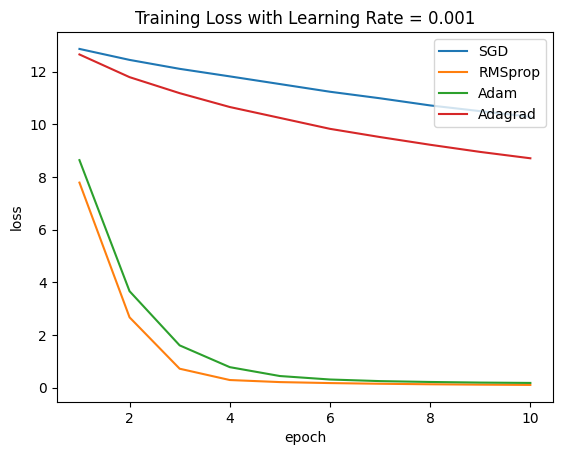

In [ ]:
# Adding EARLY STOPPING
# Defining a callback function using min_delta = 0.01 and patience = 2.
# This will stop the model training if there is no further improvement taking place
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2, min_delta = 0.01)

epochs = 10
optimizers = [SGD, RMSprop, Adam, Adagrad]
for optimizer in optimizers:
  model = prepare_model(loss_function, optimizer)
  history = model.fit(train_gen,
                      validation_data = valid_gen,
                      steps_per_epoch = train_gen.n//train_gen.batch_size,
                      validation_steps = valid_gen.n//valid_gen.batch_size,
                      epochs=epochs,
                      callbacks = [callback],
                      verbose = 0)

  # PLOT the training loss for each optimizer
  x_plot = np.arange(1,len(history.history['loss'])+1)   # x values to be used while plotting errors
  plt.plot(x_plot, history.history['loss'], label = optimizer.__name__)

plt.title("Training Loss with Learning Rate = 0.001")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

####INFERENCE:
- RMSprop optimizer works best among all 4, Adam lies close behind. SGD performs the worst among all four optimizers on our dataset, as it is not able to converge on the data well given the number of epochs.

- The optimizers work best at learning rate 0.001. At 0.01, some optimizers were diverging, and at learning rate 0.0001 and lower, it will take more time to converge.
- Therefore, I chose 0.001 as the learning rate for all four optimizers and compared their respective results

- I'll be using RMSprop optimizer in the next section, as it has turned out to be the best optimizer for our training data.


### 2.7. Plotting accuracy and loss
Choose different hyperparameters for Conv Layers, change number of Conv layer and drop-out rate and train your model. Plot training and test accuracies and loss function wrt epochs for different hyper-parameters. Do you find any improvement in classification performance. Report your analysis. (10 points)

In [ ]:
# Function to plot a model's performance
# It plots the Training, Validation accuracy and losses w.r.t. each epoch
def plot_model_perf(history):
  fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15,5))
  x_plot = np.arange(1,len(history.history['loss'])+1)   # x values to be used while plotting errors
  axes[0].plot(x_plot, history.history['loss'], label = 'Training loss')
  axes[0].plot(x_plot, history.history['val_loss'], label = 'Validation loss')
  axes[0].set_title('Losses')
  axes[0].set_ylabel('loss')
  axes[0].set_xlabel('epoch')
  axes[0].set_xticks(x_plot, x_plot)
  axes[0].legend(loc='upper right')

  axes[1].plot(x_plot, history.history['accuracy'], label = 'Training accuracy')
  axes[1].plot(x_plot, history.history['val_accuracy'], label = 'Validation accuracy')
  axes[1].set_title('Accuracy')
  axes[1].set_ylabel('accuracy')
  axes[1].set_xlabel('epoch')
  axes[1].set_xticks(x_plot, x_plot)
  axes[1].legend(loc='upper right')
  plt.show()

def run_model(model):
  history = model.fit(train_gen,
                      validation_data = valid_gen,
                      steps_per_epoch = train_gen.n//train_gen.batch_size,
                      validation_steps = valid_gen.n//valid_gen.batch_size,
                      epochs=epochs,
                      callbacks = [callback],
                      verbose = 0)
  return history

### **Model 0: Original Model**

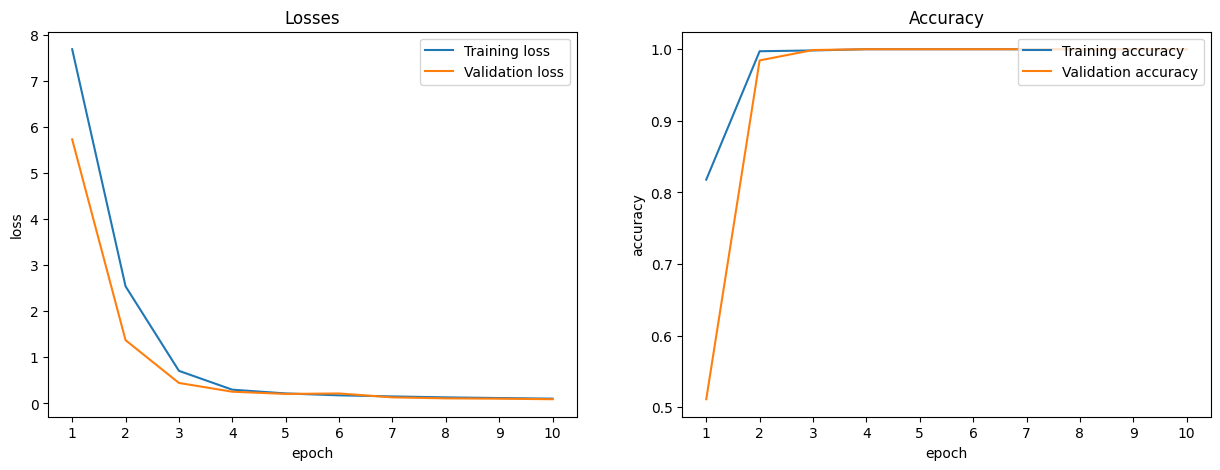


Test Accuracy: 100.0%



In [ ]:
model = prepare_model(loss_function, RMSprop)
history = run_model(model)
plot_model_perf(history)

results = model.evaluate(test_gen, verbose = 0)
print(f"\nTest Accuracy: {results[1]*100}%\n")

###**Model 1**
This model contains very few number of convolutional layers( 1 Conv layer and 1 Dense layer) as compared to original model.
Other parameters(eg - drop out, mask size, etc) remain the same.

In [ ]:
# Function which prepares a keras model using given loss function & optimizer
def prepare_model_1(loss_function, optimizer):
  # Model structure
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation = "relu"))
  model.add(BatchNormalization(synchronized=True))
  model.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

  model.add(Flatten())
  model.add(Dense(128, activation = 'relu', kernel_regularizer=regularizers.L2(l2=0.05)))
  model.add(Dropout(0.3))
  tf.keras.layers.GlobalAveragePooling2D()

  # Final Layer. Outputs correspond to the number of classes
  model.add(Dense(9, activation = 'softmax'))

  # compiling the model. Setting the loss function & optimizer
  model.compile(loss=loss_function, optimizer=optimizer(learning_rate = 0.001), metrics = ['accuracy'])
  return model

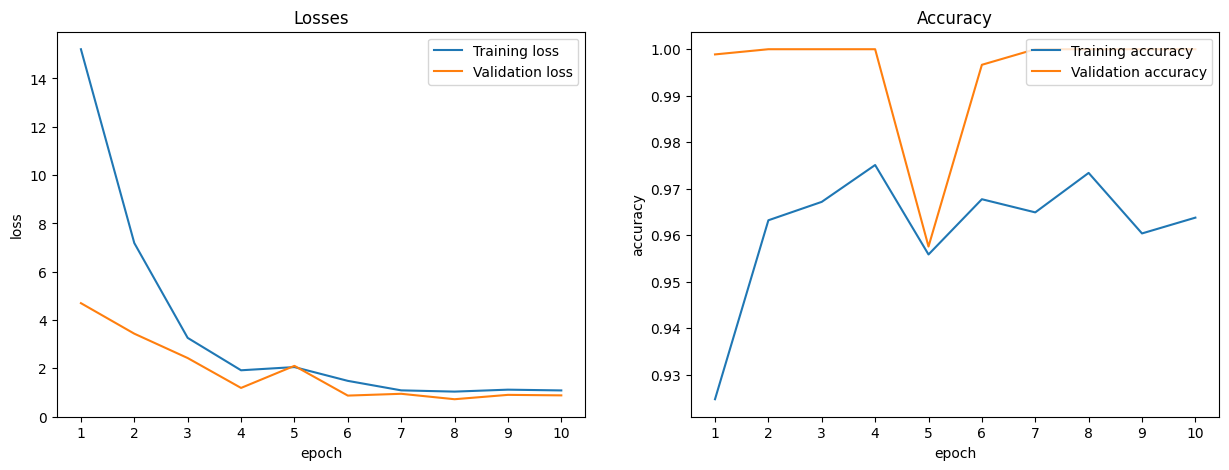


Test Accuracy: 100.0%



In [ ]:
model1 = prepare_model_1(loss_function, RMSprop)
history = run_model(model1)
plot_model_perf(history)

results = model1.evaluate(test_gen, verbose = 0)
print(f"\nTest Accuracy: {results[1]*100}%\n")

**Observations:** The accuracy does not converge to 1, as it did earlier. It also takes more epochs to converge to nearly 1.0. The losses have also increased as compared to the original model. This may be because the decrease in convolutional layers decreases the representational capacity of the model.

However, the decrease in convolutional layers will cause decrease in training time. Less number of layers are also able to achieve reasonable accuracy, if trained for a certain number of epochs.

###**Model 2**
Dropout was changed to 0.5, i.e., 50% of the input samples will be set to 0 while training

In [ ]:
# Function which prepares a keras model using given loss function & optimizer
def prepare_model_2(loss_function, optimizer):
  # Model structure
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation = "relu"))
  model.add(Conv2D(32, (3,3), activation = "relu"))
  model.add(BatchNormalization(synchronized=True))
  model.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

  model.add(Conv2D(32, (3,3), activation = "relu", strides = 2))
  model.add(Conv2D(24, (3,3), activation = "relu"))
  model.add(BatchNormalization(synchronized=True))
  model.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

  model.add(Conv2D(24, (3,3), activation = "relu", strides = 2))
  model.add(Conv2D(16, (3,3), activation = "relu"))
  model.add(BatchNormalization(synchronized=True))
  model.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

  model.add(Flatten())
  model.add(Dense(128, activation = 'relu', kernel_regularizer=regularizers.L2(l2=0.05)))
  model.add(Dense(128, activation = 'relu', kernel_regularizer=regularizers.L2(l2=0.05)))
  model.add(Dropout(0.5))
  tf.keras.layers.GlobalAveragePooling2D()

  # Final Layer. Outputs correspond to the number of classes
  model.add(Dense(9, activation = 'softmax'))

  # compiling the model. Setting the loss function & optimizer
  model.compile(loss=loss_function, optimizer=optimizer(learning_rate = 0.001), metrics = ['accuracy'])
  return model

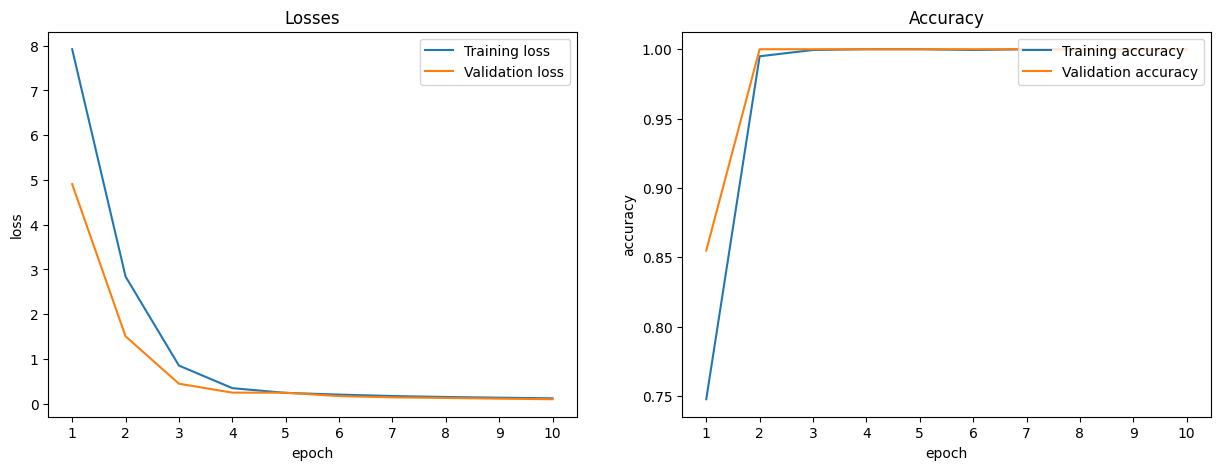


Test Accuracy: 100.0%



In [ ]:
model2 = prepare_model_2(loss_function, RMSprop)
history = run_model(model2)
plot_model_perf(history)

results = model2.evaluate(test_gen, verbose = 0)
print(f"\nTest Accuracy: {results[1]*100}%\n")

**Observations:** The losses take more time to converge(nearly 7 epochs). This may be because the decrease in inputs in training causes the model to take more time to fit the data.  

###**Model 3**
This model contains 2 convolutional layers and 2 Dense layers.
The convolutional kernel size has been increased to 10*10.

In [ ]:
# Function which prepares a keras model using given loss function & optimizer
def prepare_model_3(loss_function, optimizer):
  # Model structure
  model = Sequential()
  model.add(Conv2D(32, (10,10), activation = "relu"))
  model.add(BatchNormalization(synchronized=True))
  model.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

  model.add(Conv2D(32, (10,10), activation = "relu", strides = 2))
  model.add(BatchNormalization(synchronized=True))
  model.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

  model.add(Flatten())
  model.add(Dense(128, activation = 'relu', kernel_regularizer=regularizers.L2(l2=0.05)))
  model.add(Dense(128, activation = 'relu', kernel_regularizer=regularizers.L2(l2=0.05)))
  model.add(Dropout(0.3))
  tf.keras.layers.GlobalAveragePooling2D()

  # Final Layer. Outputs correspond to the number of classes
  model.add(Dense(9, activation = 'softmax'))

  # compiling the model. Setting the loss function & optimizer
  model.compile(loss=loss_function, optimizer=optimizer(learning_rate = 0.001), metrics = ['accuracy'])
  return model

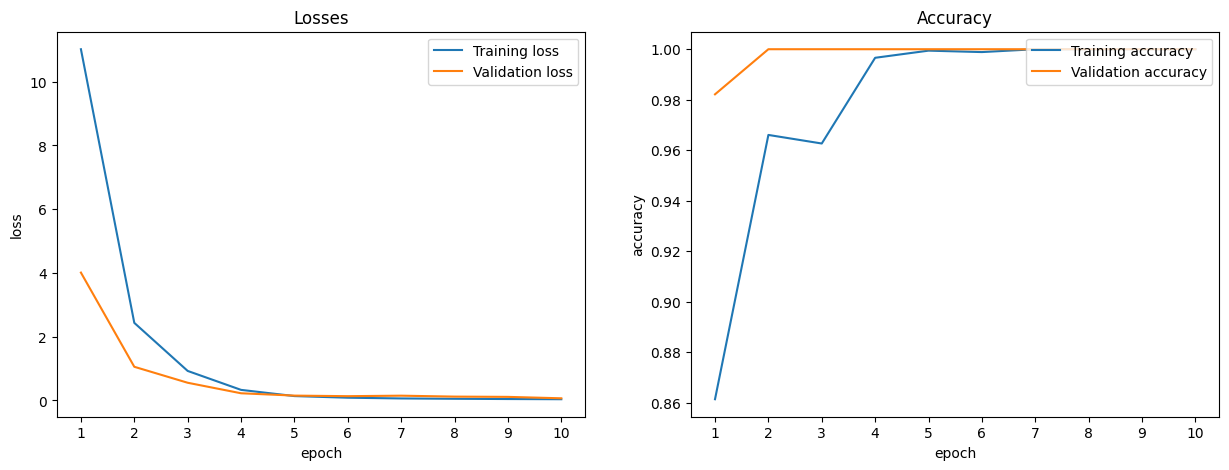


Test Accuracy: 100.0%



In [ ]:
model3 = prepare_model_3(loss_function, RMSprop)
history = run_model(model3)
plot_model_perf(history)

results = model3.evaluate(test_gen, verbose = 0)
print(f"\nTest Accuracy: {results[1]*100}%\n")

**Observations:** The model is able to perform reasonably well and converge in time. The accuracy is taking a little more epochs to converge than original model, however it is reaching 100% accuracy like earlier.
Thus, fewer convolutional layers can be used to decrease the computation of our model.

###**Model 4**
This model contains 64 neurons in two of the convolutional layers(as opposed to 32), which is more than the original model.
It also contains 1 more convolutional layer than the original model.

In [ ]:
def prepare_model_4(loss_function, optimizer):
  # Model structure
  model = Sequential()
  model.add(Conv2D(64, (3,3), activation = "relu"))
  model.add(Conv2D(64, (3,3), activation = "relu"))
  model.add(Conv2D(32, (3,3), activation = "relu"))
  model.add(BatchNormalization(synchronized=True))
  model.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

  model.add(Conv2D(32, (3,3), activation = "relu", strides = 2))
  model.add(Conv2D(24, (3,3), activation = "relu"))
  model.add(BatchNormalization(synchronized=True))
  model.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

  model.add(Conv2D(24, (3,3), activation = "relu", strides = 2))
  model.add(Conv2D(16, (3,3), activation = "relu"))
  model.add(BatchNormalization(synchronized=True))
  model.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

  model.add(Flatten())
  model.add(Dense(128, activation = 'relu', kernel_regularizer=regularizers.L2(l2=0.05)))
  model.add(Dense(128, activation = 'relu', kernel_regularizer=regularizers.L2(l2=0.05)))
  model.add(Dropout(0.3))
  tf.keras.layers.GlobalAveragePooling2D()

  # Final Layer. Outputs correspond to the number of classes
  model.add(Dense(9, activation = 'softmax'))

  # compiling the model. Setting the loss function & optimizer
  model.compile(loss=loss_function, optimizer=optimizer(learning_rate = 0.001), metrics = ['accuracy'])
  return model

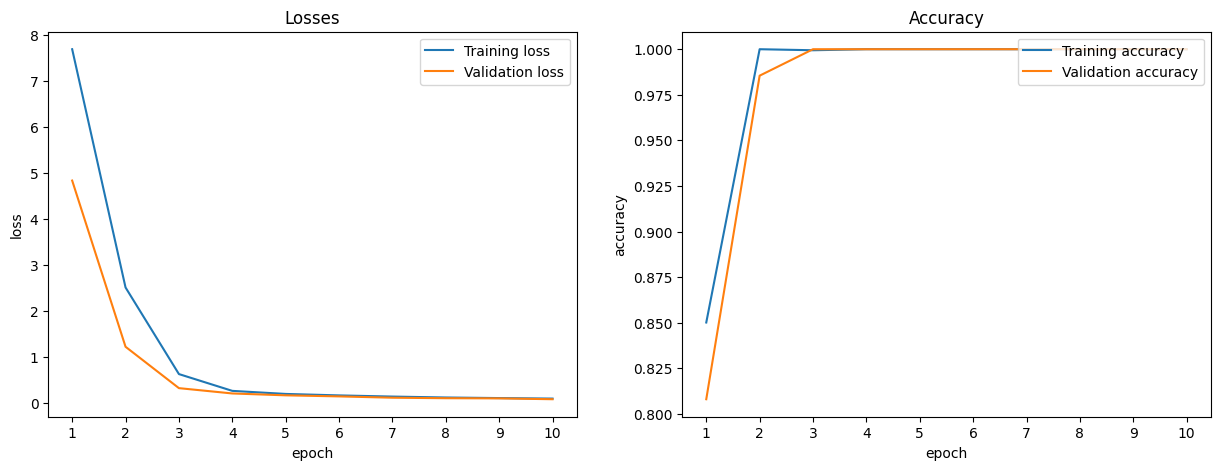


Test Accuracy: 100.0%



In [ ]:
model4 = prepare_model_4(loss_function, RMSprop)
history = run_model(model4)
plot_model_perf(history)

results = model4.evaluate(test_gen, verbose = 0)
print(f"\nTest Accuracy: {results[1]*100}%\n")

**Observations:** The model performs better than the original model as it is able to converge to very low losses and high accuracy in fewer epochs.
However, it will converge faster at the cost of more computational time.